In [43]:
#importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
#reading and displaying datasets
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

print("Customers Dataset")
display(customers.head())
print("Products Dataset")
display(products.head())
print("Transactions Dataset")
display(transactions.head())

Customers Dataset


,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


Products Dataset


,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


Transactions Dataset


,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [13]:
#checking for missing values
print(customers.isnull().sum())
print(products.isnull().sum())
print(transactions.isnull().sum())

CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


In [15]:
#checking for duplicates
print(customers.duplicated().sum())
print(products.duplicated().sum())
print(transactions.duplicated().sum())

0
0
0


In [37]:
#inspecting datatypes
print(customers.info())
print(products.info())
print(transactions.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   CustomerID    200 non-null    object        
 1   CustomerName  200 non-null    object        
 2   Region        200 non-null    object        
 3   SignupDate    200 non-null    datetime64[ns]
dtypes: datetime64[ns](1), object(3)
memory usage: 6.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.2+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column    

In [38]:
#converting data columns to datatime format
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

In [67]:
# combining the datasets
merged_data = transactions.merge(customers, on='CustomerID').merge(products, on='ProductID')
display(merged_data.head())

# merged_data.to_csv('merged_data.csv', index=False)

In [40]:
merged_data = merged_data.drop(columns=['Price_y'])
merged_data = merged_data.rename(columns={'Price_x': 'Price'})
display(merged_data.head())

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price,CustomerName,Region,SignupDate,ProductName,Category
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03,ComfortLiving Bluetooth Speaker,Electronics
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04,ComfortLiving Bluetooth Speaker,Electronics
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04,ComfortLiving Bluetooth Speaker,Electronics
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11,ComfortLiving Bluetooth Speaker,Electronics
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15,ComfortLiving Bluetooth Speaker,Electronics


In [42]:
# basic descriptive statistics
print(merged_data.describe())

          Quantity   TotalValue       Price
count  1000.000000  1000.000000  1000.00000
mean      2.537000   689.995560   272.55407
std       1.117981   493.144478   140.73639
min       1.000000    16.080000    16.08000
25%       2.000000   295.295000   147.95000
50%       3.000000   588.880000   299.93000
75%       4.000000  1011.660000   404.40000
max       4.000000  1991.040000   497.76000


C:\Users\lenovo\AppData\Local\Temp\ipykernel_10412\276375706.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sales_by_region.index, y=sales_by_region.values, palette="viridis")


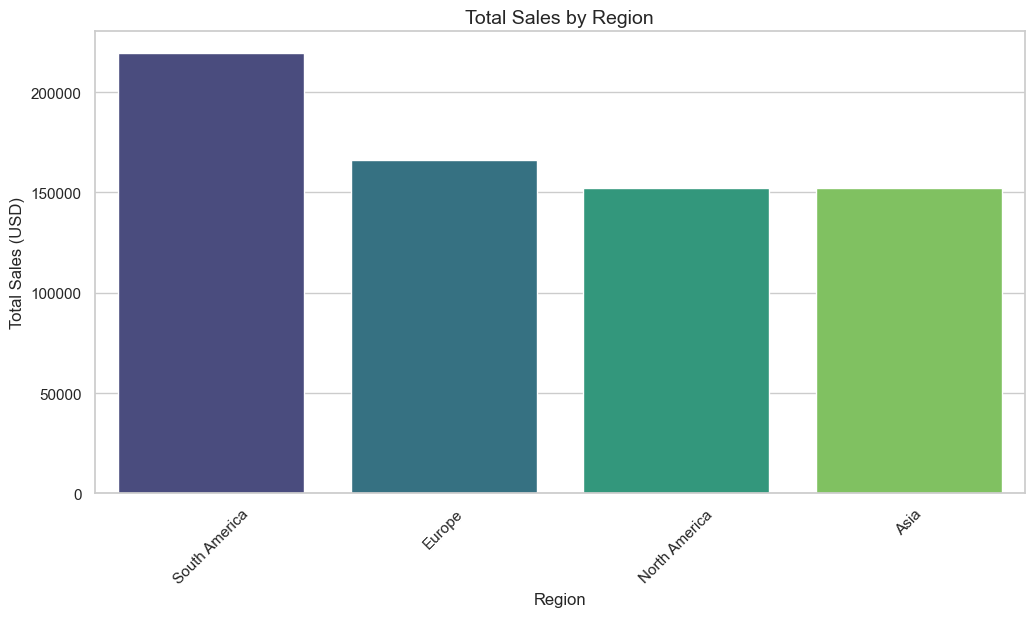

C:\Users\lenovo\AppData\Local\Temp\ipykernel_10412\276375706.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sales_by_category.index, y=sales_by_category.values, palette="magma")


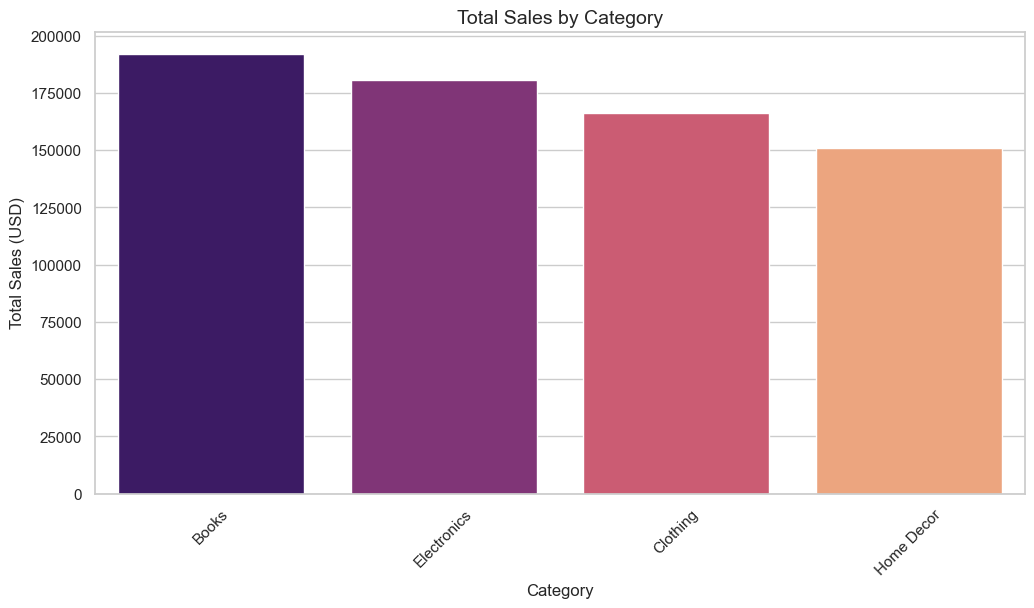

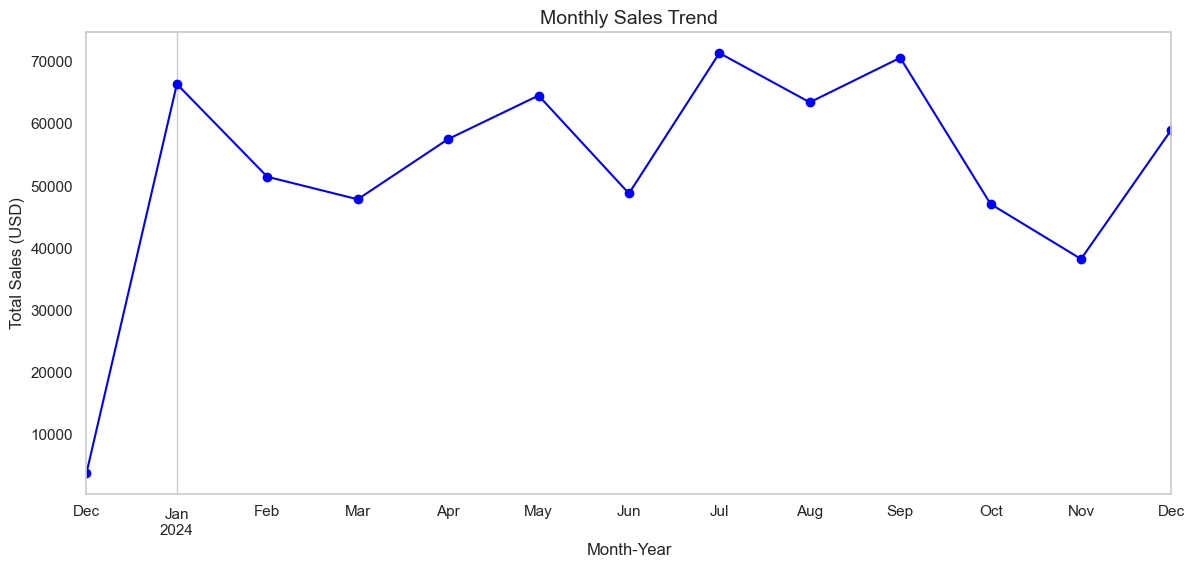

In [48]:
sns.set_theme(style="whitegrid")

sales_by_region = merged_data.groupby("Region")["TotalValue"].sum().sort_values(ascending=False)
sales_by_category = merged_data.groupby("Category")["TotalValue"].sum().sort_values(ascending=False)
merged_data['MonthYear'] = merged_data['TransactionDate'].dt.to_period('M')
monthly_sales = merged_data.groupby("MonthYear")["TotalValue"].sum()

#sales by region plot
plt.figure(figsize=(12, 6))
sns.barplot(x=sales_by_region.index, y=sales_by_region.values, palette="viridis")
plt.title("Total Sales by Region", fontsize=14)
plt.ylabel("Total Sales (USD)")
plt.xlabel("Region")
plt.xticks(rotation=45)
plt.show()

# sales by category
plt.figure(figsize=(12, 6))
sns.barplot(x=sales_by_category.index, y=sales_by_category.values, palette="magma")
plt.title("Total Sales by Category", fontsize=14)
plt.ylabel("Total Sales (USD)")
plt.xlabel("Category")
plt.xticks(rotation=45)
plt.show()

# monthly sales trends
plt.figure(figsize=(14, 6))
monthly_sales.plot(kind='line', marker='o', color='blue')
plt.title("Monthly Sales Trend", fontsize=14)
plt.ylabel("Total Sales (USD)")
plt.xlabel("Month-Year")
plt.grid(axis='y')
plt.show()

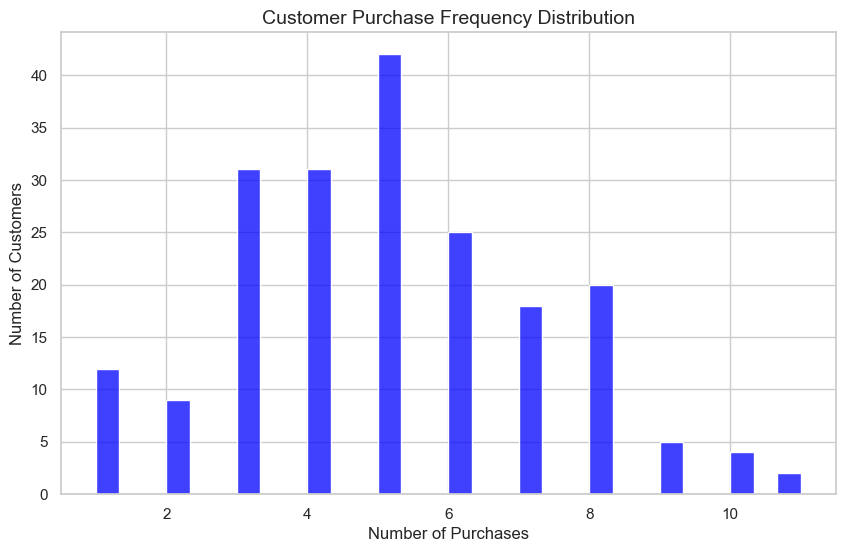

In [51]:
# no of transactions per customer
customer_purchase_freq = merged_data['CustomerID'].value_counts()

# Plot the distribution
plt.figure(figsize=(10, 6))
sns.histplot(customer_purchase_freq, bins=30, kde=False, color='blue')
plt.title('Customer Purchase Frequency Distribution', fontsize=14)
plt.xlabel('Number of Purchases')
plt.ylabel('Number of Customers')
plt.show()

C:\Users\lenovo\AppData\Local\Temp\ipykernel_10412\3544476975.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=region_aov.values, x=region_aov.index, palette='viridis')


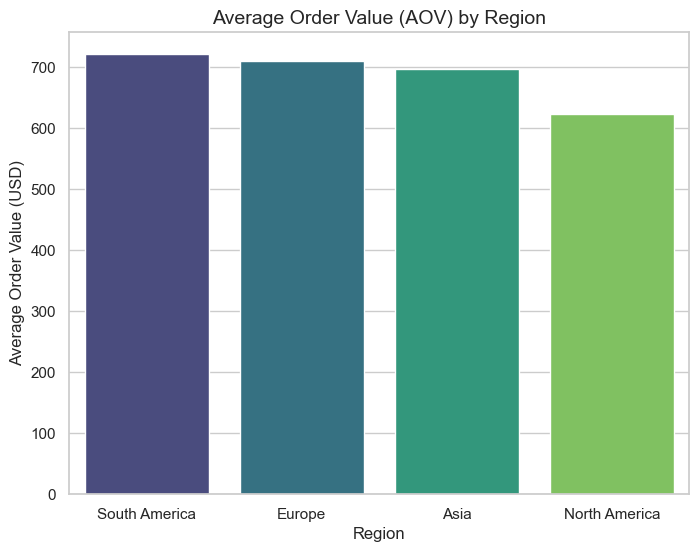

In [56]:
# AOV by region
region_aov = merged_data.groupby('Region')['TotalValue'].mean().sort_values(ascending=False)

# Plot AOV by region
plt.figure(figsize=(8, 6))
sns.barplot(y=region_aov.values, x=region_aov.index, palette='viridis')
plt.title('Average Order Value (AOV) by Region', fontsize=14)
plt.ylabel('Average Order Value (USD)')
plt.xlabel('Region')
plt.show()

C:\Users\lenovo\AppData\Local\Temp\ipykernel_10412\3246010157.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=product_popularity.values, y=product_popularity.index, palette='coolwarm')


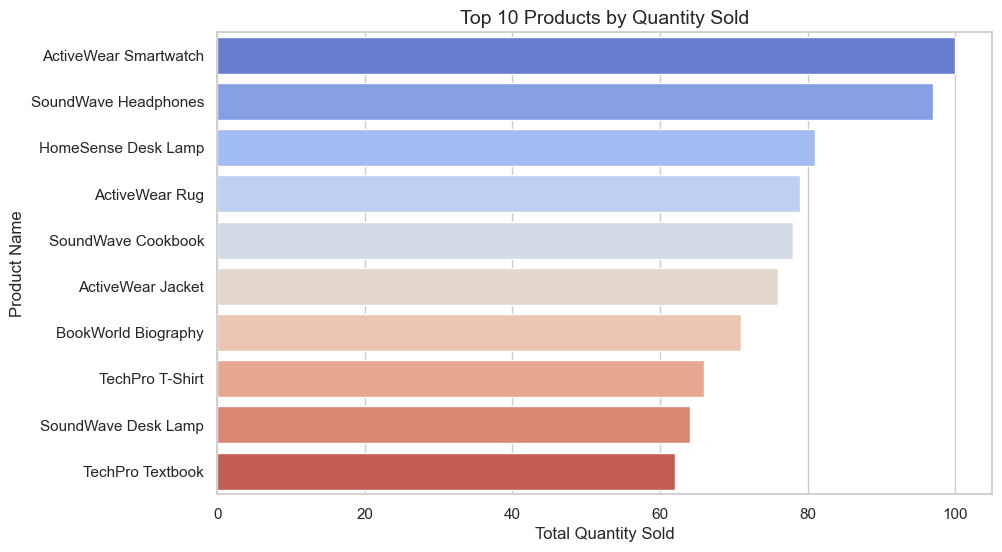

In [57]:
# 10 most popular products
product_popularity = merged_data.groupby('ProductName')['Quantity'].sum().sort_values(ascending=False).head(10)

# Plot the top 10 products by quantity sold
plt.figure(figsize=(10, 6))
sns.barplot(x=product_popularity.values, y=product_popularity.index, palette='coolwarm')
plt.title('Top 10 Products by Quantity Sold', fontsize=14)
plt.xlabel('Total Quantity Sold')
plt.ylabel('Product Name')
plt.show()

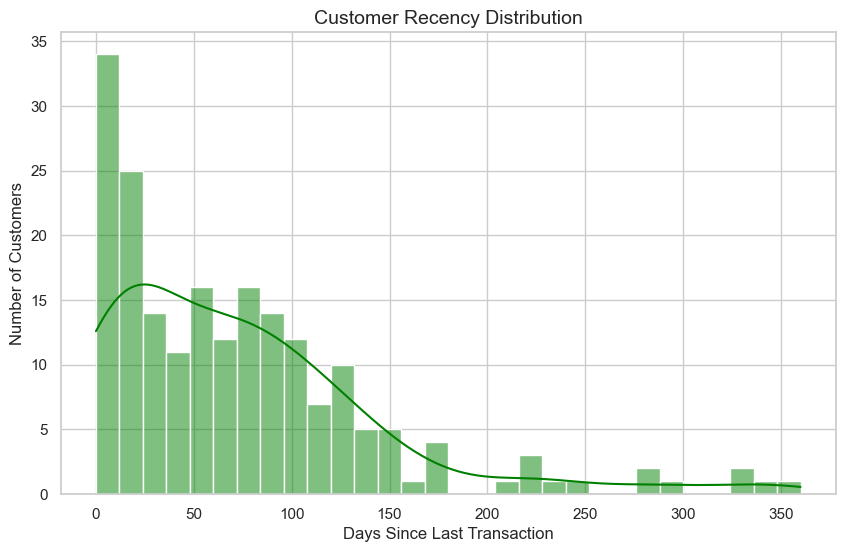

In [58]:
# days since last transaction for each customer
latest_date = merged_data['TransactionDate'].max()
customer_recency = merged_data.groupby('CustomerID')['TransactionDate'].max().apply(lambda x: (latest_date - x).days)

# Plot the distribution of recency
plt.figure(figsize=(10, 6))
sns.histplot(customer_recency, bins=30, kde=True, color='green')
plt.title('Customer Recency Distribution', fontsize=14)
plt.xlabel('Days Since Last Transaction')
plt.ylabel('Number of Customers')
plt.show()

In [61]:
# total revenue and AOV for each region
region_stats = merged_data.groupby('Region').agg(
    TotalRevenue=('TotalValue', 'sum'),
    AverageOrderValue=('TotalValue', 'mean')
).reset_index()

print(region_stats)


          Region  TotalRevenue  AverageOrderValue
0           Asia     152074.97         697.591606
1         Europe     166254.63         710.489872
2  North America     152313.40         624.235246
3  South America     219352.56         721.554474


In [60]:
# monthly and quarterly total sales 
merged_data['YearMonth'] = merged_data['TransactionDate'].dt.to_period('M')

monthly_sales = merged_data.groupby('YearMonth')['TotalValue'].sum().reset_index()

merged_data['Quarter'] = merged_data['TransactionDate'].dt.to_period('Q')
quarterly_sales = merged_data.groupby('Quarter')['TotalValue'].sum().reset_index()

print("Monthly Sales:")
print(monthly_sales)
print("\nQuarterly Sales:")
print(quarterly_sales)


Monthly Sales:
   YearMonth  TotalValue
0    2023-12     3769.52
1    2024-01    66376.39
2    2024-02    51459.27
3    2024-03    47828.73
4    2024-04    57519.06
5    2024-05    64527.74
6    2024-06    48771.18
7    2024-07    71366.39
8    2024-08    63436.74
9    2024-09    70603.75
10   2024-10    47063.22
11   2024-11    38224.37
12   2024-12    59049.20

Quarterly Sales:
  Quarter  TotalValue
0  2023Q4     3769.52
1  2024Q1   165664.39
2  2024Q2   170817.98
3  2024Q3   205406.88
4  2024Q4   144336.79


In [66]:
# dormant customers
from datetime import datetime

latest_transaction_date = merged_data.groupby("CustomerID")["TransactionDate"].max()
current_date = datetime.now()
days_inactive = (current_date - latest_transaction_date).dt.days

dormant_customers_count = (days_inactive > 75).sum()
total_customers = merged_data["CustomerID"].nunique()
dormant_percentage = (dormant_customers_count / total_customers) * 100

print(f"Dormant Customers: {dormant_customers_count}")
print(f"Percentage of Dormant Customers: {dormant_percentage:.2f}%")


Dormant Customers: 119
Percentage of Dormant Customers: 59.80%
